# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    response = requests.get(city_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit="s"
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quelimane,-17.8786,36.8883,26.97,65,40,3.09,MZ,2023-03-29 15:37:03
1,saskylakh,71.9167,114.0833,-26.57,100,96,2.13,RU,2023-03-29 15:39:07
2,avarua,-21.2078,-159.7750,25.03,94,20,4.63,CK,2023-03-29 15:37:03
3,saint anthony,45.0205,-93.2180,-6.22,59,0,3.09,US,2023-03-29 15:37:04
4,east london,-33.0153,27.9116,20.52,52,0,7.20,ZA,2023-03-29 15:39:08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

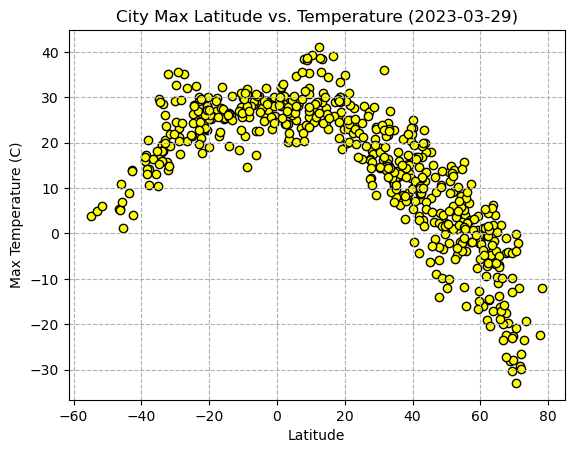

In [103]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="yellow", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-03-29)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

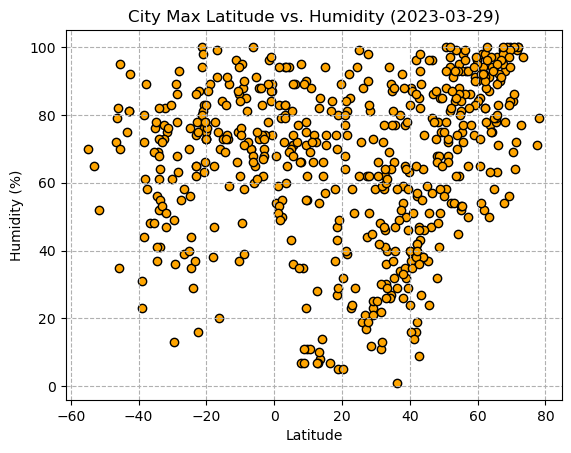

In [104]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="orange", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-03-29)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

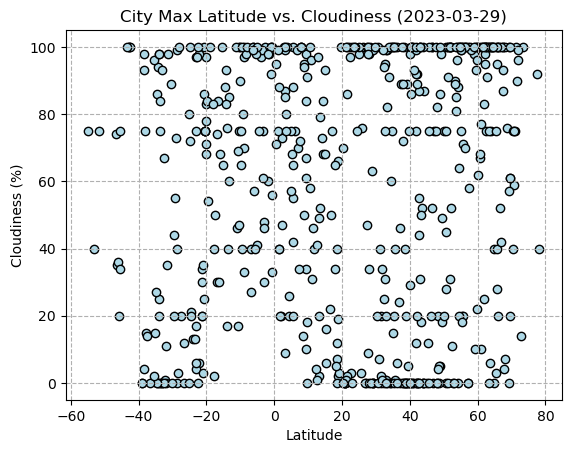

In [105]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-03-29)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

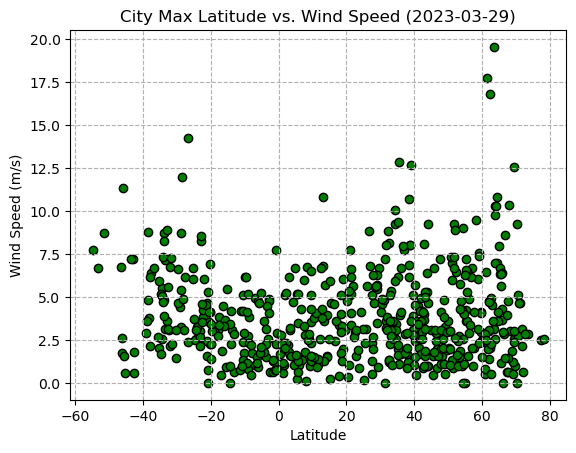

In [106]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-03-29)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [3]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saskylakh,71.9167,114.0833,-26.57,100,96,2.13,RU,2023-03-29 15:39:07
3,saint anthony,45.0205,-93.2180,-6.22,59,0,3.09,US,2023-03-29 15:37:04
8,marzuq,14.4000,46.4667,24.53,62,84,1.59,YE,2023-03-29 15:39:10
9,jamestown,42.0970,-79.2353,7.53,56,92,4.92,US,2023-03-29 15:37:00
10,provideniya,64.3833,-173.3000,-6.69,94,100,6.98,RU,2023-03-29 15:27:27


In [4]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quelimane,-17.8786,36.8883,26.97,65,40,3.09,MZ,2023-03-29 15:37:03
2,avarua,-21.2078,-159.7750,25.03,94,20,4.63,CK,2023-03-29 15:37:03
4,east london,-33.0153,27.9116,20.52,52,0,7.20,ZA,2023-03-29 15:39:08
5,ushuaia,-54.8000,-68.3000,3.81,70,75,7.72,AR,2023-03-29 15:39:09
6,hobart,-42.8794,147.3294,14.03,81,100,7.20,AU,2023-03-29 15:34:37


In [5]:

# Define a function to create Linear Regression plots. This long function creates an entire plot with all of the math. Arguments are fed in for 
# both axes, hemisphere location, y label, location of eq, color of points and color of line. Since we create this function once, we are able to
# use it to make many plots with little code. 
def lin_regress(x_axis, y_axis, location, y_label, eq_loc, point_color, line_color):
    plt.scatter(x_axis, y_axis, color=point_color, edgecolors="black")
    plt.suptitle(f"{location} Hemisphere Cities vs. {y_label} (2023-03-29)", weight="bold")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid(linestyle="--")
    
    (slope, intercept ,rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    fit = slope * x_axis + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.annotate(line_eq, eq_loc, fontsize=15, color="red")
    plt.title(f"The r-value is: {rvalue}", loc="right")
    plt.plot(x_axis, fit, color=line_color)
    
    
    

###  Temperature vs. Latitude Linear Regression Plot

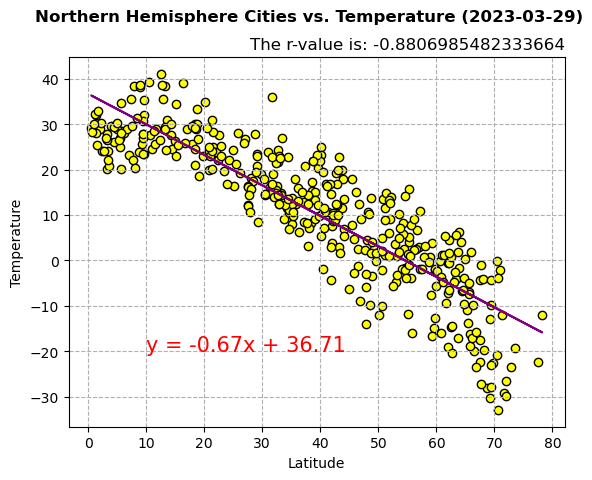

In [6]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern", "Temperature", (10, -20), "yellow", "purple")

plt.savefig("../output_data/FigRegress.png")

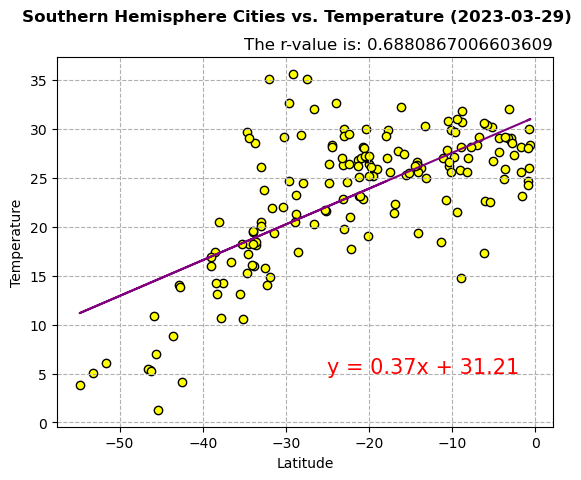

In [111]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern", "Temperature", (-25, 5), "yellow", "purple")

**Discussion about the linear relationship:** // It appears that the closer you get to a latitude of 0, the hotter the max temperatures get

### Humidity vs. Latitude Linear Regression Plot

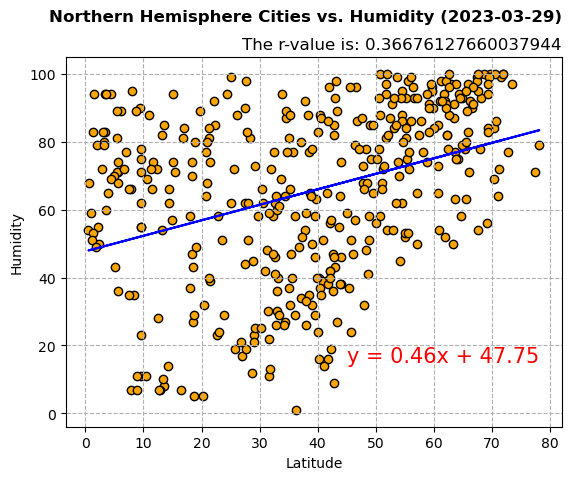

In [112]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern", "Humidity", (45, 15), "orange", "blue")

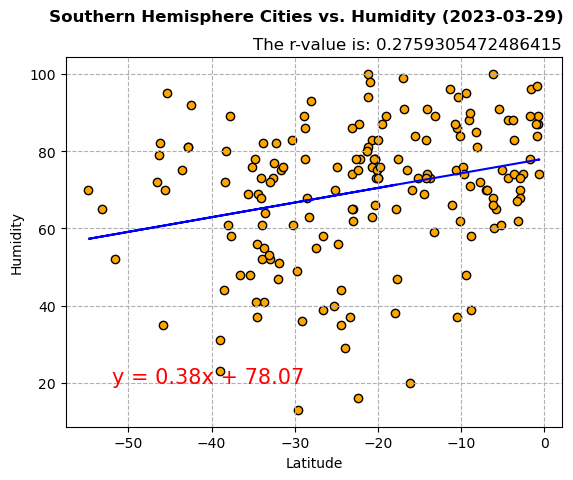

In [113]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern", "Humidity", (-52, 20), "orange", "blue")

**Discussion about the linear relationship:** // It appears that the further north you go, the more humid it gets; though not quite as dramatically as tempurature changes. There are, however, a lot more northern cities plotted than southern.

### Cloudiness vs. Latitude Linear Regression Plot

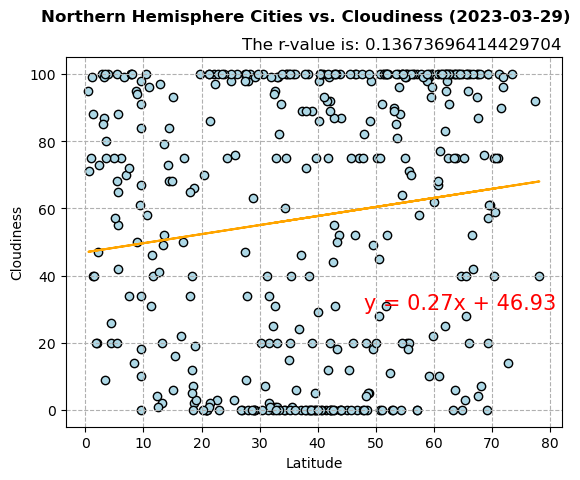

In [114]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern", "Cloudiness", (48, 30), "lightblue", "orange")

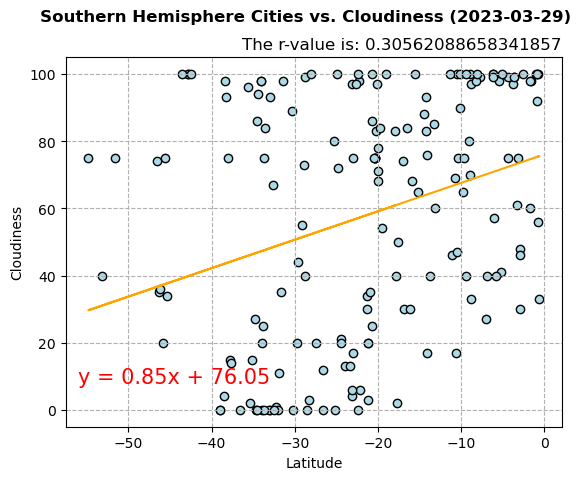

In [115]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern", "Cloudiness", (-56, 8), "lightblue", "orange")

**Discussion about the linear relationship:** // It seems that cloud percentage trends upwars the further north you go. The rise is more apparent going from negative latitudes to 0.

### Wind Speed vs. Latitude Linear Regression Plot

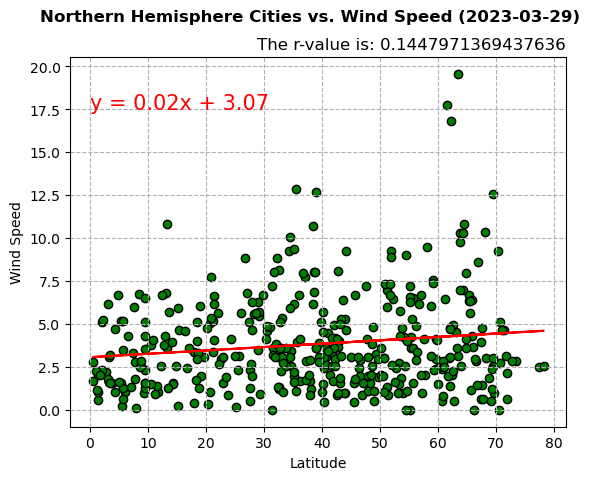

In [116]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern", "Wind Speed", (0, 17.5), "green", "red")

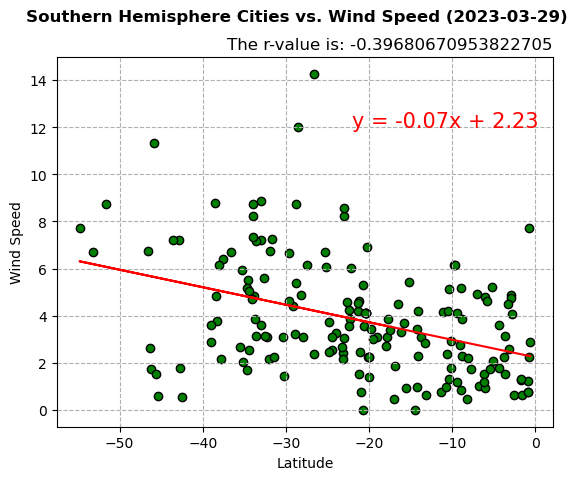

In [117]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern", "Wind Speed", (-22, 12), "green", "red")

**Discussion about the linear relationship:** // Wind Speeds stay relatively flat north of the equator.